In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


Bad key "text.kerning_factor" on line 4 in
/usr/local/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# read in the file
data = pd.read_csv("train_data.csv")

In [3]:
# Look for first five data
data.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [4]:
# Check for null
data.isnull().sum()

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64

In [5]:
# Look for type
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   name                       113 non-null    object 
 1   bonus                      61 non-null     float64
 2   deferral_payments          28 non-null     float64
 3   deferred_income            34 non-null     float64
 4   director_fees              13 non-null     float64
 5   email_address              83 non-null     object 
 6   exercised_stock_options    81 non-null     float64
 7   expenses                   73 non-null     float64
 8   from_messages              65 non-null     float64
 9   from_poi_to_this_person    65 non-null     float64
 10  from_this_person_to_poi    65 non-null     float64
 11  loan_advances              2 non-null      float64
 12  long_term_incentive        49 non-null     float64
 13  other                      69 non-null     float64

In [6]:
# Map the True to 1 and otherwise
data['poi'] = data['poi'].map(lambda x: 1 if x is True else 0)

# # Deal with the email address
# def convertEmail(x):
#     if (x is not np.nan):
#         return x.split('@')[0]
#     return x
# data['email_address'] = data['email_address'].map(convertEmail)

data.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,1,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,1,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,1,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,1,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,1,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [7]:
# Select the numeric feature and object feature
numeric_cols = data.drop(columns=["poi"]).select_dtypes(include=['float64']).columns
object_cols = data.select_dtypes(include=['object']).columns

In [8]:
print(numeric_cols)
print(object_cols)

Index(['bonus', 'deferral_payments', 'deferred_income', 'director_fees',
       'exercised_stock_options', 'expenses', 'from_messages',
       'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances',
       'long_term_incentive', 'other', 'restricted_stock',
       'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi',
       'to_messages', 'total_payments', 'total_stock_value'],
      dtype='object')
Index(['name', 'email_address'], dtype='object')


In [9]:
# Make our own custom imputer
from sklearn.base import TransformerMixin

class FillCategory(TransformerMixin):
    def __init__(self, cols=None):
        self.cols = cols
        
    def transform(self, df):
        X = df.copy()
        for col in self.cols:
            X[col].fillna(X[col].value_counts().index[0], inplace=True)
        return X
        
    def fit(self, *_):
        return self   
    


class FillNumeric(TransformerMixin):
    def __init__(self, cols=None, strategy='mean'):
        super().__init__()
        self.cols = cols
        self.strategy = strategy
        
    def transform(self, df, y=None):
        X = df.copy()
        imputer = SimpleImputer(missing_values=np.nan, strategy=self.strategy)
        
        for col in X.columns:
            X[col] = imputer.fit_transform(X[[col]])
            
        return X
    
    def fit(self, df, y=None):
        return self

In [10]:
# Look for the feautures
data.describe()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
count,6.100000e+01,2.800000e+01,3.400000e+01,13.000000,8.100000e+01,73.000000,65.000000,65.000000,65.000000,2.000000e+00,4.900000e+01,6.900000e+01,113.000000,8.200000e+01,10.000000,7.300000e+01,65.000000,65.000000,9.600000e+01,9.800000e+01
mean,1.147436e+06,6.344374e+05,-4.625664e+05,89397.846154,2.985081e+06,51040.547945,711.323077,64.800000,40.092308,4.096250e+07,7.926171e+05,4.471774e+05,0.115044,1.294855e+06,-221885.700000,2.739025e+05,1111.369231,2156.061538,2.590977e+06,3.527136e+06
std,1.505189e+06,8.603646e+05,8.095392e+05,41143.391399,6.004174e+06,47596.682104,2074.497628,91.863214,88.901407,5.736404e+07,9.504645e+05,1.341564e+06,0.320497,2.498335e+06,205191.374121,1.716647e+05,1165.852016,2811.676718,1.056645e+07,7.182997e+06
min,7.000000e+04,-1.025000e+05,-3.504386e+06,3285.000000,3.285000e+03,148.000000,12.000000,0.000000,0.000000,4.000000e+05,7.102300e+04,2.000000e+00,0.000000,4.409300e+04,-560222.000000,4.770000e+02,2.000000,57.000000,1.480000e+02,-4.409300e+04
25%,4.500000e+05,7.656750e+04,-5.527032e+05,101250.000000,4.004780e+05,18834.000000,19.000000,10.000000,0.000000,2.068125e+07,2.750000e+05,9.720000e+02,0.000000,2.689220e+05,-389621.750000,2.061210e+05,178.000000,517.000000,3.024025e+05,4.211518e+05
50%,7.500000e+05,1.951900e+05,-1.175340e+05,108579.000000,8.500100e+05,41953.000000,45.000000,28.000000,7.000000,4.096250e+07,4.221580e+05,5.238200e+04,0.000000,4.628225e+05,-139856.500000,2.516540e+05,599.000000,1088.000000,1.106740e+06,9.979710e+05
75%,1.000000e+06,8.342052e+05,-2.708325e+04,112492.000000,2.165172e+06,59175.000000,215.000000,88.000000,27.000000,6.124375e+07,8.318090e+05,3.620960e+05,0.000000,9.664905e+05,-77953.250000,2.885890e+05,1902.000000,2649.000000,1.985668e+06,2.493616e+06
max,8.000000e+06,2.964506e+06,-1.042000e+03,125034.000000,3.434838e+07,228763.000000,14368.000000,528.000000,411.000000,8.152500e+07,5.145434e+06,1.035973e+07,1.000000,1.476169e+07,44093.000000,1.111258e+06,4527.000000,15149.000000,1.035598e+08,4.911008e+07


In [11]:
# Find the base null accuracy => 88 %
data['poi'].value_counts(normalize=True)

0    0.884956
1    0.115044
Name: poi, dtype: float64

In [12]:
# Use the model without any feature engineering
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split

# Get X and y
X = data.drop(columns=['poi', 'email_address', 'name'], axis=1)
y = data['poi'].values

# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Get the model
forest_param = {'clf__n_estimators': [5, 10, 20, 30], 'clf__max_depth': [3, 5, 7, 10]}
model = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), ('clf', RandomForestClassifier())])
gridSearch = GridSearchCV(model, forest_param)

# Fit the data
gridSearch.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterion='gini',
                                                               max_depth=No

In [13]:
print("The best param is {}\nThe best score is {}".format(gridSearch.best_params_, gridSearch.best_score_))

The best param is {'clf__max_depth': 3, 'clf__n_estimators': 20}
The best score is 0.9222222222222222


## First Submission

In [14]:
# Frist submit
TEST = pd.read_csv('./test_features.csv')
NAME = TEST[['name']]
TEST.drop(columns=['email_address', 'name'], inplace=True)

# Fill the Nan
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
filN = FillNumeric()
TEST = filN.fit_transform(TEST)
TEST = pd.concat((TEST, NAME), axis = 1)

In [15]:
# Fit the result
result = gridSearch.predict_proba(TEST.drop(columns=['name']))[: ,0]
result

array([0.86970358, 0.79769626, 0.81244133, 0.87016702, 0.77510273,
       0.58954518, 0.39206349, 0.40928571, 0.87637224, 0.87049925,
       0.68541122, 0.55271892, 0.58605225, 0.43149592, 0.87672361,
       0.57271892, 0.96016251, 0.74941195, 0.75308882, 0.68541122,
       0.275     , 0.87604938, 0.86736323, 0.34008981, 0.91836395,
       0.45928571, 0.41857466, 0.72044686, 0.97260489, 0.69413764,
       0.62707789, 0.92159906, 0.79262249])

In [16]:
# Change to csv
output = pd.DataFrame({'name': TEST['name'], 'poi': result})
# output.to_csv('submission.csv', index=False)

### EDA part 

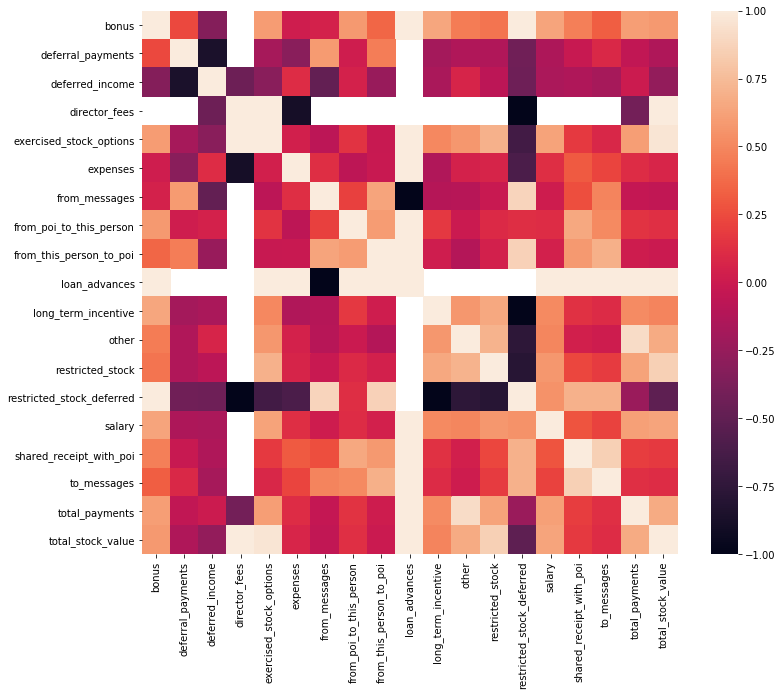

In [17]:
# Look for the heatmap of the corr
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop(columns=['email_address', 'poi', 'name']).corr())

In [18]:
#Using select best
from sklearn.feature_selection import SelectKBest, f_classif

# Make the model
k_best = SelectKBest(f_classif, k = 6)

In [19]:
k_best.fit_transform(filN.fit_transform(X), y)

array([[ 1.97941750e+07,  1.74839000e+05,  2.74836400e+06,
         4.20636000e+05,  5.05050000e+05,  2.25425390e+07],
       [ 1.92500000e+07,  2.21220000e+04,  6.84367200e+06,
         1.11125800e+06,  8.68271600e+06,  2.60936720e+07],
       [ 1.62439600e+06,  1.57332400e+06,  8.69220000e+05,
         2.11844000e+05,  2.00388500e+06,  2.49361600e+06],
       [ 2.98508078e+06,  9.07502000e+05,  9.85032000e+05,
         2.24305000e+05,  2.65261200e+06,  9.85032000e+05],
       [ 2.98508078e+06,  4.86000000e+02,  1.26027000e+05,
         2.40189000e+05,  1.63929700e+06,  1.26027000e+05],
       [ 3.07660640e+07,  2.85600000e+03,  1.29485479e+06,
         2.73902521e+05,  9.10930000e+04,  3.07660640e+07],
       [ 8.30855200e+06,  1.47950000e+05,  3.57620600e+06,
         1.58403000e+05,  3.60300000e+05,  1.18847580e+07],
       [ 2.98508078e+06,  1.01740000e+05,  6.98242000e+05,
         2.88542000e+05,  1.49034400e+06,  6.98242000e+05],
       [ 3.43483840e+07,  1.03597290e+07,  1.476

In [20]:
p_values = pd.DataFrame({'column': X.columns, 'p_value': k_best.pvalues_}).sort_values('p_value')
p_values.head()

,column,p_value
4,exercised_stock_options,2.764999e-08
18,total_stock_value,1.174373e-06
14,salary,1.646150e-04
17,total_payments,4.078205e-03
12,restricted_stock,8.522231e-03


In [21]:
# Make the pipeLine
k_best = SelectKBest(f_classif)

# Get X and y
X = data.drop(columns=['poi', 'email_address', 'name'], axis=1)
y = data['poi'].values

# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Get the model
forest_param .update({'k_best__k': list(range(5, 8)) + ['all']})
model = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')), 
                  ('k_best', k_best),
                  ('clf', RandomForestClassifier())])
gridSearch = GridSearchCV(model, forest_param)

# Fit the data
gridSearch.fit(X_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:114: UserWarning: Features [9] are constant.
  UserWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/_univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  

GridSearchCV(cv=None, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('imputer',
                                        SimpleImputer(add_indicator=False,
                                                      copy=True,
                                                      fill_value=None,
                                                      missing_values=nan,
                                                      strategy='mean',
                                                      verbose=0)),
                                       ('k_best',
                                        SelectKBest(k=10,
                                                    score_func=<function f_classif at 0x1a18902440>)),
                                       ('clf',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                           

In [22]:
print("The best param is {}\nThe best score is {}".format(gridSearch.best_params_, gridSearch.best_score_))

The best param is {'clf__max_depth': 3, 'clf__n_estimators': 20, 'k_best__k': 6}
The best score is 0.9222222222222223


In [23]:
p_values.head(7)

,column,p_value
4,exercised_stock_options,2.764999e-08
18,total_stock_value,1.174373e-06
14,salary,1.646150e-04
17,total_payments,4.078205e-03
12,restricted_stock,8.522231e-03
11,other,2.153412e-02
0,bonus,2.259351e-02


In [24]:
# Second submit
TEST = pd.read_csv('./test_features.csv')
NAME = TEST[['name']]
TEST.drop(columns=['email_address', 'name'], inplace=True)

# Fill the Nan
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
filN = FillNumeric()
TEST = filN.fit_transform(TEST)
TEST = pd.concat((TEST, NAME), axis = 1)

In [25]:
# Fit the result
result = gridSearch.predict_proba(TEST.drop(columns=['name']))[: ,0]
result

array([0.87069077, 0.42161094, 0.70910133, 0.87087841, 0.5922261 ,
       0.49044427, 0.50048625, 0.215     , 0.85079803, 0.90142393,
       0.73423625, 0.71715292, 0.82446061, 0.36090292, 0.75717708,
       0.265     , 0.91064618, 0.44222999, 0.55957382, 0.76983876,
       0.11785714, 0.82087841, 0.65224225, 0.36090292, 0.65224225,
       0.66784375, 0.59064103, 0.70538821, 0.96567795, 0.87087841,
       0.75538821, 0.85113637, 0.8881861 ])

In [26]:
# Change to csv
output = pd.DataFrame({'name': TEST['name'], 'poi': result})
output.to_csv('submission2.csv', index=False)

In [56]:
# Doing the standard scaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.ensemble import GradientBoostingClassifier

# Make the pipeLine
k_best = SelectKBest(f_classif)

# Get X and y
X = data.drop(columns=['poi', 'email_address', 'name'], axis=1)
y = data['poi'].values

# Split to train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Get the model
forest_param = {'clf__max_depth': [10, 100], 'clf__n_estimators': [1, 10, 100], 'clf__min_samples_leaf': [2, 4]}
model = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
                  ('normailize', MinMaxScaler()),
                  ('clf', GradientBoostingClassifier())])
gridSearch = GridSearchCV(model, forest_param)

# Fit the data
model.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('imputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='mean',
                               verbose=0)),
                ('normailize', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('clf',
                 GradientBoostingClassifier(ccp_alpha=0.0,
                                            criterion='friedman_mse', init=None,
                                            learning_rate=0.1, loss='deviance',
                                            max_depth=3, max_features=None,
                                            max_leaf_nodes=None,
                                            min_impurity_decrease=0.0,
                                            min_impurity_split=None,
                                            min_samples_leaf=1,
                                            min_samples_split=2,
                         

In [55]:
print("The best param is {}\nThe best score is {}".format(gridSearch.best_params_, gridSearch.best_score_))

The best param is {'clf__max_depth': 10, 'clf__min_samples_leaf': 4, 'clf__n_estimators': 10}
The best score is 0.9222222222222223


In [57]:
# Second submit
TEST = pd.read_csv('./test_features.csv')
NAME = TEST[['name']]
TEST.drop(columns=['email_address', 'name'], inplace=True)

# Fill the Nan
impute = SimpleImputer(missing_values=np.nan, strategy='mean')
filN = FillNumeric()
TEST = filN.fit_transform(TEST)
TEST = pd.concat((TEST, NAME), axis = 1)

In [58]:
# Fit the result
result = model.predict_proba(TEST.drop(columns=['name']))[: ,0]
result

array([9.99632908e-01, 3.26623588e-04, 7.90755824e-01, 9.99948072e-01,
       9.95094410e-01, 2.78238995e-04, 6.59588677e-04, 1.19291003e-02,
       9.99909727e-01, 4.45133919e-01, 6.87009197e-01, 1.72352677e-02,
       2.54590160e-02, 2.73262266e-02, 9.48901359e-01, 6.48694097e-05,
       9.99669905e-01, 9.73546952e-03, 9.03179879e-01, 5.88693203e-01,
       1.52177608e-02, 9.91565844e-01, 9.66725746e-01, 1.46685120e-02,
       9.88074184e-01, 8.18610545e-01, 2.30655311e-02, 9.71504703e-01,
       9.99792504e-01, 3.18404927e-02, 9.05096177e-03, 9.99119681e-01,
       2.04329314e-01])

In [59]:
# Change to csv
output = pd.DataFrame({'name': TEST['name'], 'poi': result})
output.to_csv('submission3.csv', index=False)